In [1]:
data_link="https://raw.githubusercontent.com/ayan-zz/Phising-Website/main/Training%20Dataset.arff"

In [2]:
import pandas as pd
from scipy.io import arff
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [3]:
dff=arff.loadarff('Training Dataset.arff')
d1=pd.DataFrame(dff[0])
d1.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,b'-1',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',b'1',b'-1',b'-1'
1,b'1',b'1',b'1',b'1',b'1',b'-1',b'0',b'1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'-1'
2,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'1',b'-1',b'1',b'-1',b'1',b'0',b'-1',b'-1'
3,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'1',b'1',...,b'1',b'1',b'-1',b'-1',b'1',b'-1',b'1',b'-1',b'1',b'-1'
4,b'1',b'0',b'-1',b'1',b'1',b'-1',b'1',b'1',b'-1',b'1',...,b'-1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'1'


In [4]:
print(d1.shape)

(11055, 31)


In [5]:
d1.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [4]:
print("b'-1' nos-->",(d1['URL_of_Anchor']==b'-1').values.sum())
print("b'0' nos-->",(d1['URL_of_Anchor']==b'0').values.sum())
print("b'1' nos-->",(d1['URL_of_Anchor']==b'1').values.sum())

b'-1' nos--> 3282
b'0' nos--> 5337
b'1' nos--> 2436


In [7]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   having_IP_Address            11055 non-null  object
 1   URL_Length                   11055 non-null  object
 2   Shortining_Service           11055 non-null  object
 3   having_At_Symbol             11055 non-null  object
 4   double_slash_redirecting     11055 non-null  object
 5   Prefix_Suffix                11055 non-null  object
 6   having_Sub_Domain            11055 non-null  object
 7   SSLfinal_State               11055 non-null  object
 8   Domain_registeration_length  11055 non-null  object
 9   Favicon                      11055 non-null  object
 10  port                         11055 non-null  object
 11  HTTPS_token                  11055 non-null  object
 12  Request_URL                  11055 non-null  object
 13  URL_of_Anchor                11

In [8]:
d1.isna().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [9]:
d1_cat=[feature for feature in d1.columns if d1[feature].dtype=='O']
d1_num=[feature for feature in d1.columns if d1[feature].dtype!='O']
print(d1_cat)
print(d1_num)

['having_IP_Address', 'URL_Length', 'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report', 'Result']
[]


No numerical values present in the dataset 

In [5]:
df=d1.replace({b'-1':1, b'1':0, b'0':2})
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,0,0,0,1,1,1,1,1,0,...,0,0,1,1,1,1,0,0,1,1
1,0,0,0,0,0,1,2,0,1,0,...,0,0,1,1,2,1,0,0,0,1
2,0,2,0,0,0,1,1,1,1,0,...,0,0,0,1,0,1,0,2,1,1
3,0,2,0,0,0,1,1,1,0,0,...,0,0,1,1,0,1,0,1,0,1
4,0,2,1,0,0,1,0,0,1,0,...,1,0,1,1,2,1,0,0,0,0


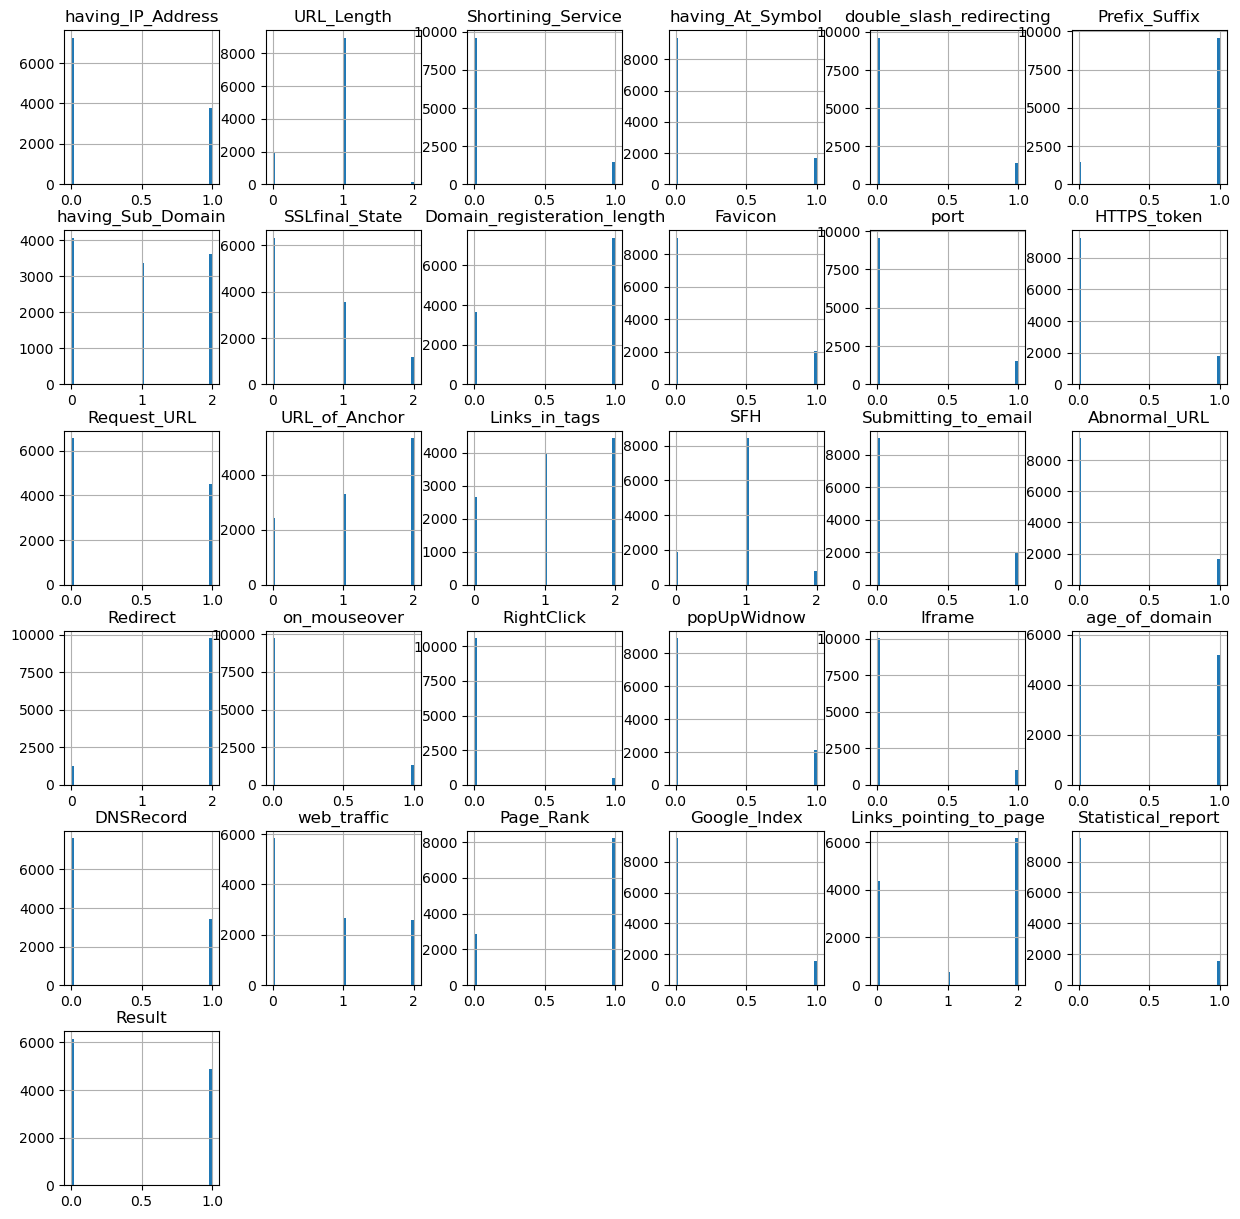

In [23]:
df.hist(bins = 50,figsize = (15,15))
plt.show()

In [7]:
col_cat=['having_IP_Address', 'URL_Length', 'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report']
df_x=df.iloc[:,:-1]
df_one_hot=pd.get_dummies(df_x,columns=col_cat)
df_one_hot.head()

,having_IP_Address_0,having_IP_Address_1,URL_Length_0,URL_Length_1,URL_Length_2,Shortining_Service_0,Shortining_Service_1,having_At_Symbol_0,having_At_Symbol_1,double_slash_redirecting_0,...,web_traffic_2,Page_Rank_0,Page_Rank_1,Google_Index_0,Google_Index_1,Links_pointing_to_page_0,Links_pointing_to_page_1,Links_pointing_to_page_2,Statistical_report_0,Statistical_report_1
0,0,1,1,0,0,1,0,1,0,0,...,0,0,1,1,0,1,0,0,0,1
1,1,0,1,0,0,1,0,1,0,1,...,1,0,1,1,0,1,0,0,1,0
2,1,0,0,0,1,1,0,1,0,1,...,0,0,1,1,0,0,0,1,0,1
3,1,0,0,0,1,1,0,1,0,1,...,0,0,1,1,0,0,1,0,1,0
4,1,0,0,0,1,0,1,1,0,1,...,1,0,1,1,0,1,0,0,1,0


In [232]:
df_one_hot.columns

Index(['having_IP_Address_0', 'having_IP_Address_1', 'URL_Length_0',
       'URL_Length_1', 'URL_Length_2', 'Shortining_Service_0',
       'Shortining_Service_1', 'having_At_Symbol_0', 'having_At_Symbol_1',
       'double_slash_redirecting_0', 'double_slash_redirecting_1',
       'Prefix_Suffix_0', 'Prefix_Suffix_1', 'having_Sub_Domain_0',
       'having_Sub_Domain_1', 'having_Sub_Domain_2', 'SSLfinal_State_0',
       'SSLfinal_State_1', 'SSLfinal_State_2', 'Domain_registeration_length_0',
       'Domain_registeration_length_1', 'Favicon_0', 'Favicon_1', 'port_0',
       'port_1', 'HTTPS_token_0', 'HTTPS_token_1', 'Request_URL_0',
       'Request_URL_1', 'URL_of_Anchor_0', 'URL_of_Anchor_1',
       'URL_of_Anchor_2', 'Links_in_tags_0', 'Links_in_tags_1',
       'Links_in_tags_2', 'SFH_0', 'SFH_1', 'SFH_2', 'Submitting_to_email_0',
       'Submitting_to_email_1', 'Abnormal_URL_0', 'Abnormal_URL_1',
       'Redirect_0', 'Redirect_2', 'on_mouseover_0', 'on_mouseover_1',
       'RightClick

In [8]:
df_one_hot.drop(['having_IP_Address_0','Shortining_Service_0','having_At_Symbol_0','double_slash_redirecting_0',
                'Prefix_Suffix_0','Domain_registeration_length_0','Favicon_0','port_0','HTTPS_token_0','Request_URL_0',
                'Submitting_to_email_0','Abnormal_URL_0','Redirect_0','on_mouseover_0','RightClick_0',
                'popUpWidnow_0','Iframe_0','age_of_domain_0','DNSRecord_0','Page_Rank_0','Google_Index_0','Statistical_report_0']
                ,axis=1,inplace=True)

In [9]:
df_one=df_one_hot.copy()
df_one.shape

(11055, 46)

In [10]:
df_one.columns

Index(['having_IP_Address_1', 'URL_Length_0', 'URL_Length_1', 'URL_Length_2',
       'Shortining_Service_1', 'having_At_Symbol_1',
       'double_slash_redirecting_1', 'Prefix_Suffix_1', 'having_Sub_Domain_0',
       'having_Sub_Domain_1', 'having_Sub_Domain_2', 'SSLfinal_State_0',
       'SSLfinal_State_1', 'SSLfinal_State_2', 'Domain_registeration_length_1',
       'Favicon_1', 'port_1', 'HTTPS_token_1', 'Request_URL_1',
       'URL_of_Anchor_0', 'URL_of_Anchor_1', 'URL_of_Anchor_2',
       'Links_in_tags_0', 'Links_in_tags_1', 'Links_in_tags_2', 'SFH_0',
       'SFH_1', 'SFH_2', 'Submitting_to_email_1', 'Abnormal_URL_1',
       'Redirect_2', 'on_mouseover_1', 'RightClick_1', 'popUpWidnow_1',
       'Iframe_1', 'age_of_domain_1', 'DNSRecord_1', 'web_traffic_0',
       'web_traffic_1', 'web_traffic_2', 'Page_Rank_1', 'Google_Index_1',
       'Links_pointing_to_page_0', 'Links_pointing_to_page_1',
       'Links_pointing_to_page_2', 'Statistical_report_1'],
      dtype='object')

In [11]:
#HTML and JavaScript based Features
df_html=pd.DataFrame(df_one,columns=['Redirect_2','on_mouseover_1','RightClick_1','popUpWidnow_1', 'Iframe_1'])
#Abnormal Based Features
df_abnormal=pd.DataFrame(df_one,columns=['Request_URL_1','URL_of_Anchor_0','URL_of_Anchor_1', 'URL_of_Anchor_2', 'Links_in_tags_0',
       'Links_in_tags_1', 'Links_in_tags_2', 'SFH_0', 'SFH_1', 'SFH_2',
       'Submitting_to_email_1', 'Abnormal_URL_1'])
#Address Bar based Features
df_address=pd.DataFrame(df_one,columns=['having_IP_Address_1', 'URL_Length_0', 'URL_Length_1', 'URL_Length_2',
       'Shortining_Service_1', 'having_At_Symbol_1',
       'double_slash_redirecting_1', 'Prefix_Suffix_1', 'having_Sub_Domain_0',
       'having_Sub_Domain_1', 'having_Sub_Domain_2', 'SSLfinal_State_0',
       'SSLfinal_State_1', 'SSLfinal_State_2', 'Domain_registeration_length_1',
       'Favicon_1', 'port_1', 'HTTPS_token_1'])
#Domain based Features
df_domain=pd.DataFrame(df_one,columns=['age_of_domain_1', 'DNSRecord_1', 'web_traffic_0', 'web_traffic_1',
       'web_traffic_2', 'Page_Rank_1', 'Google_Index_1','Links_pointing_to_page_0', 'Links_pointing_to_page_1',
       'Links_pointing_to_page_2', 'Statistical_report_1'])

In [12]:
df_domain.head()

,age_of_domain_1,DNSRecord_1,web_traffic_0,web_traffic_1,web_traffic_2,Page_Rank_1,Google_Index_1,Links_pointing_to_page_0,Links_pointing_to_page_1,Links_pointing_to_page_2,Statistical_report_1
0,1,1,0,1,0,1,0,1,0,0,1
1,1,1,0,0,1,1,0,1,0,0,0
2,0,1,1,0,0,1,0,0,0,1,1
3,1,1,1,0,0,1,0,0,1,0,0
4,1,1,0,0,1,1,0,1,0,0,0


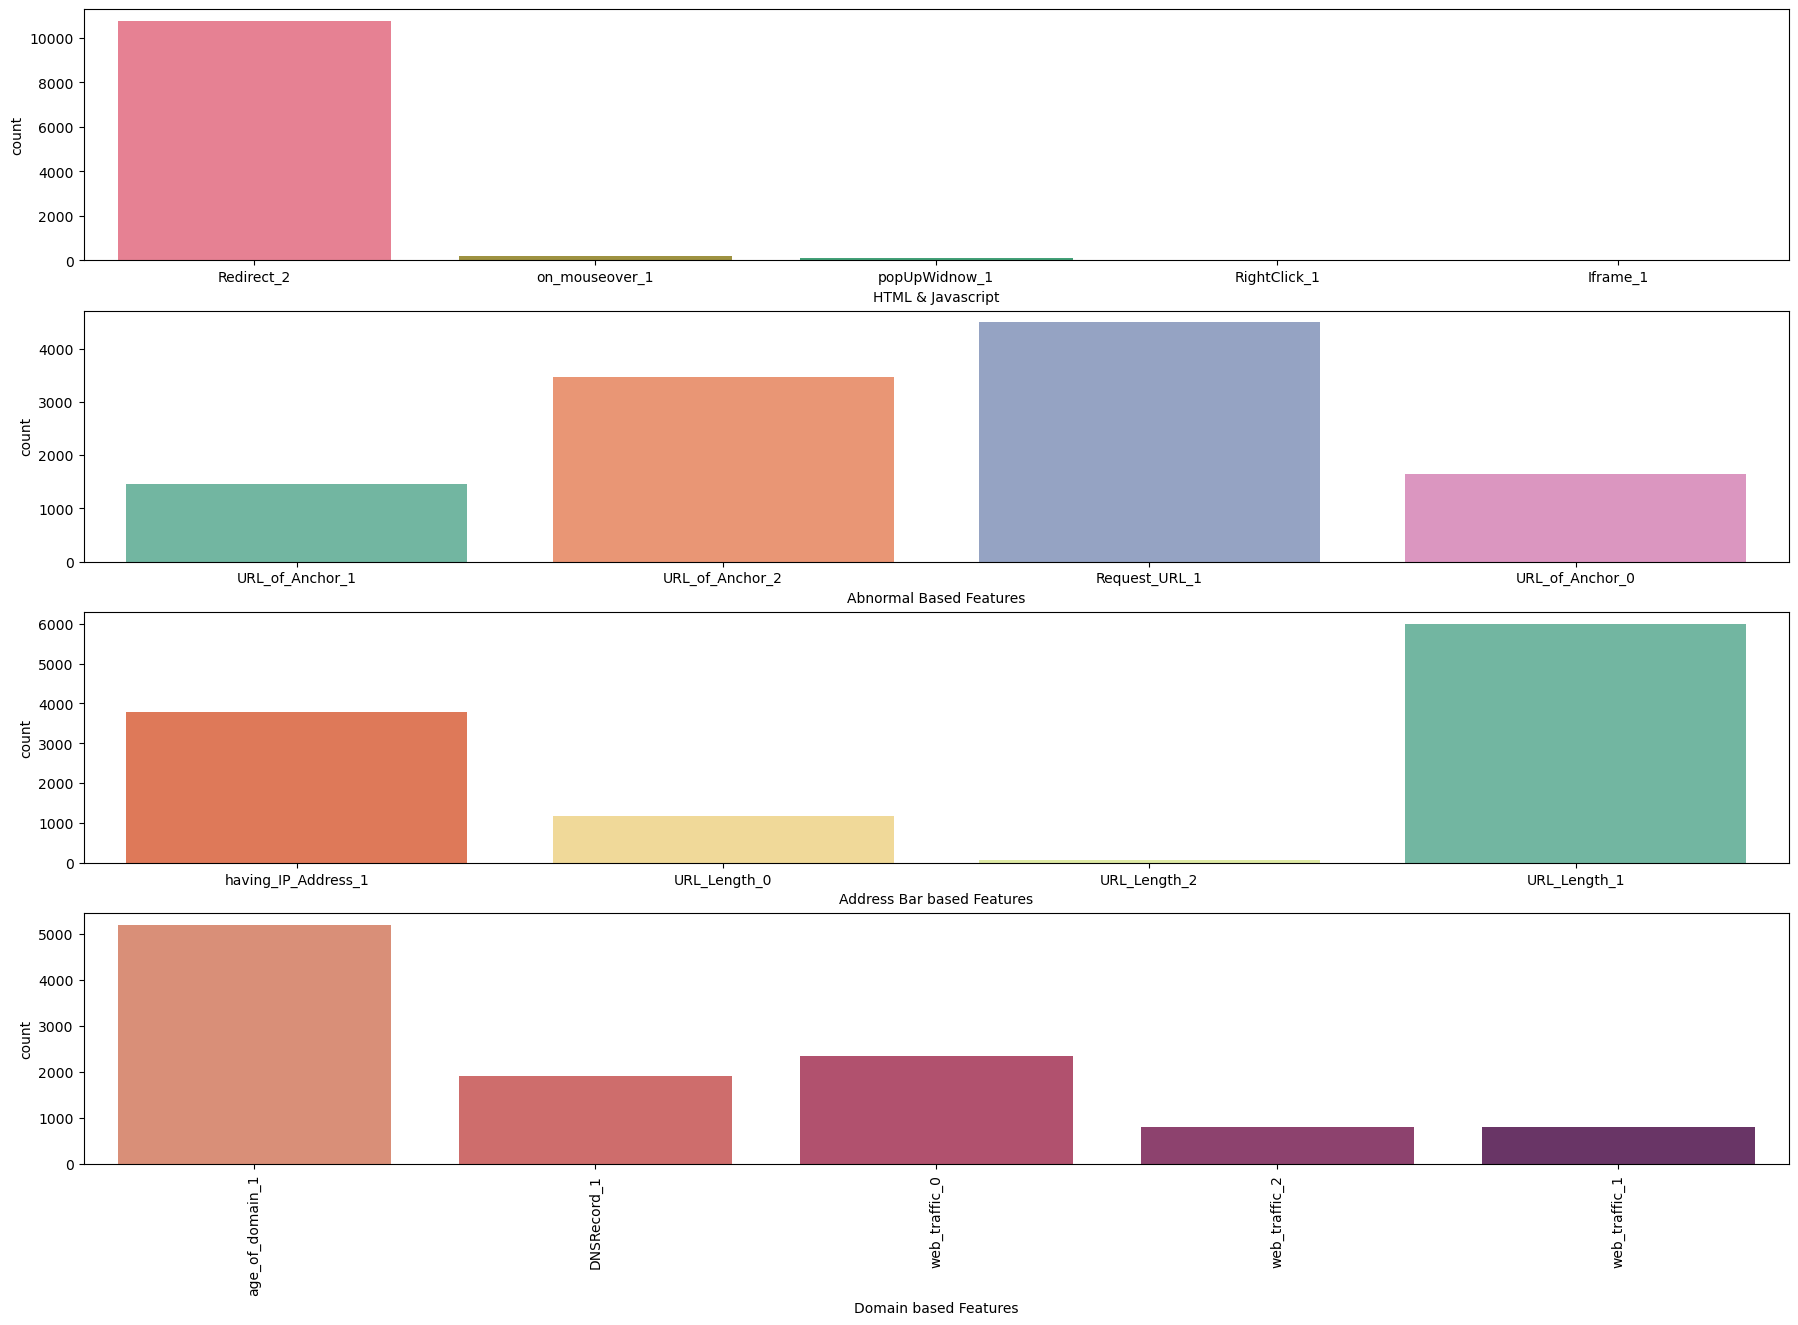

In [24]:
dummy = df_html.idxmax(axis=1)
dummy.name = 'HTML & Javascript'
df_one['HTML & Javascript']= dummy
dummy1 = df_abnormal.idxmax(axis=1)
dummy1.name = 'Abnormal Based Features'
df_one['Abnormal Based Features']= dummy1
dummy2 = df_address.idxmax(axis=1)
dummy2.name = 'Address Bar based Features'
df_one['Address Bar based Features']= dummy2
dummy3 = df_domain.idxmax(axis=1)
dummy3.name = 'Domain based Features'
df_one['Domain based Features']= dummy3


fig, axs = plt.subplots(1, 4, figsize=(22,15))
plt.subplot(411)
sns.countplot(x='HTML & Javascript',data=df_one,palette="husl")
plt.subplot(412)
sns.countplot(x='Abnormal Based Features',data=df_one,palette="Set2")
plt.subplot(413)
sns.countplot(x='Address Bar based Features',data=df_one,palette="Spectral")
plt.subplot(414)
sns.countplot(x='Domain based Features',data=df_one,palette="flare")
plt.xticks(rotation=90)
plt.show()

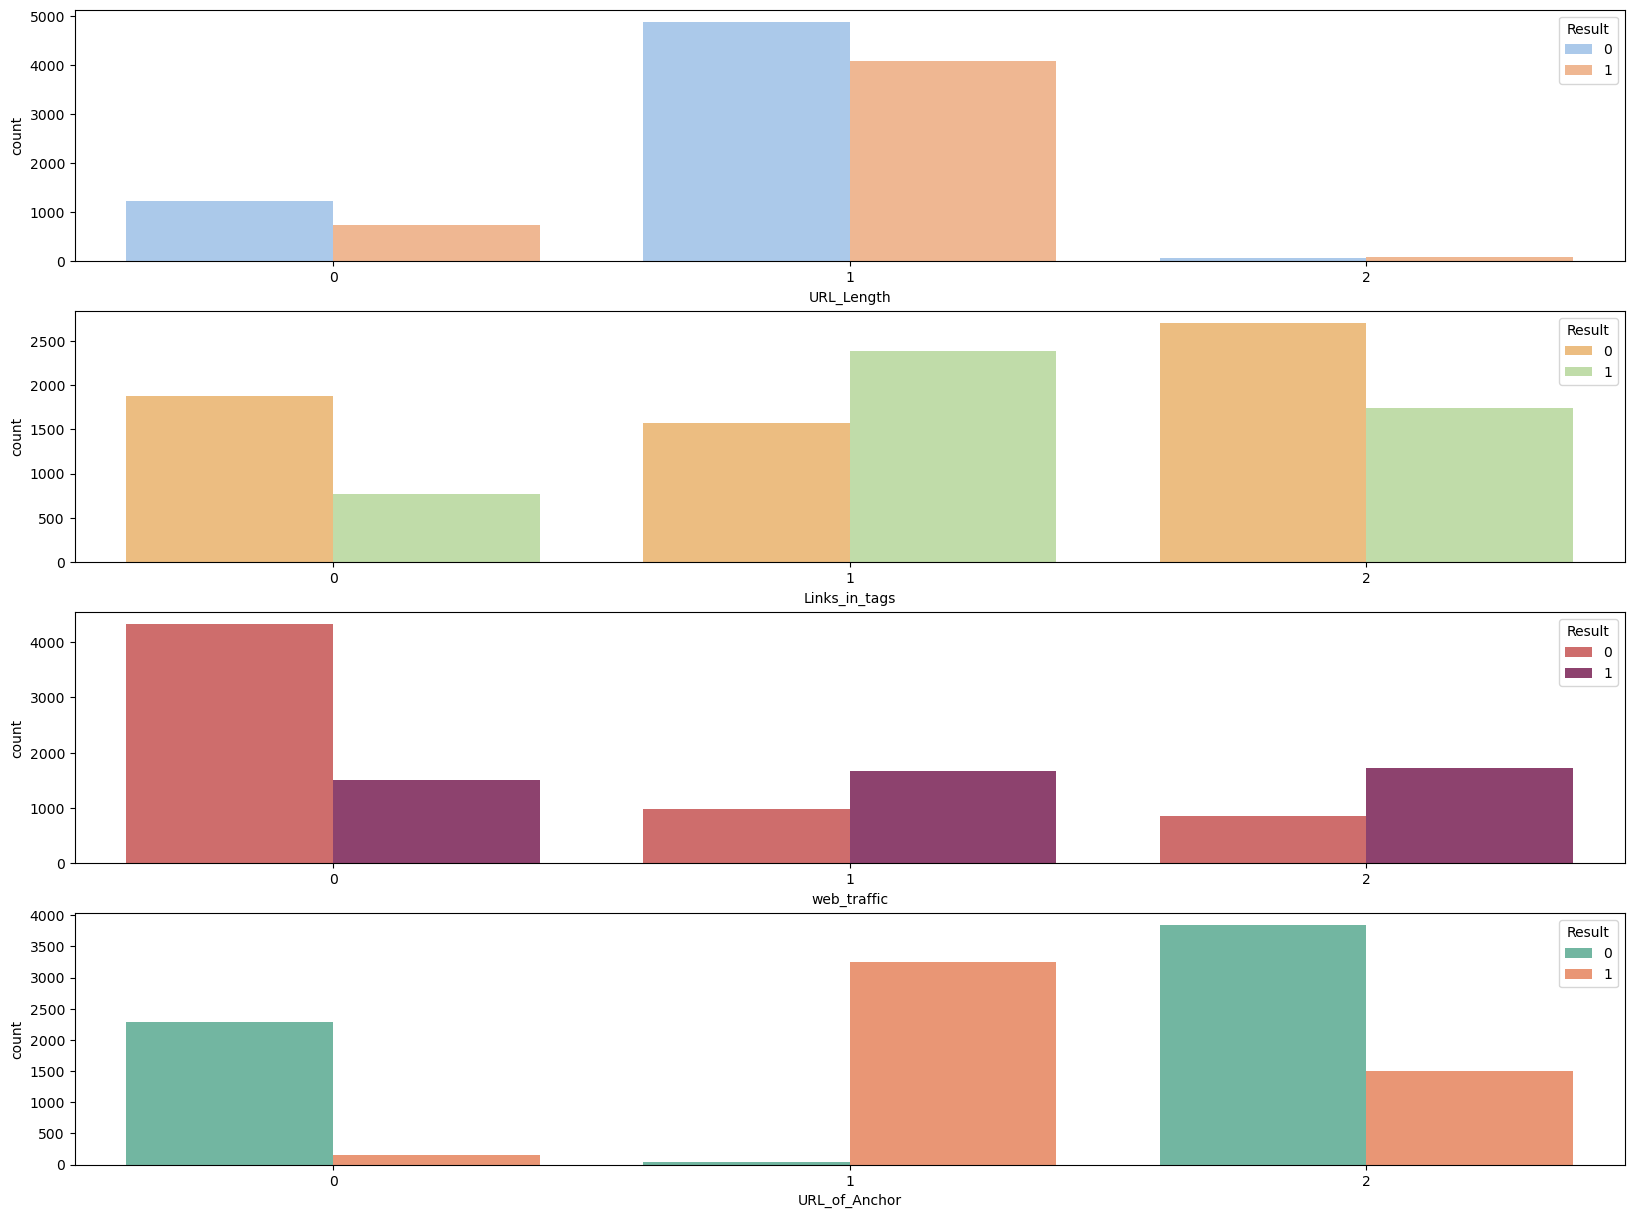

In [13]:
fig, axs = plt.subplots(1, 4, figsize=(20,15))
plt.subplot(411)
sns.countplot(data=df,x='URL_Length',hue='Result',palette='pastel')
plt.subplot(412)
sns.countplot(data=df,x='Links_in_tags', hue='Result',palette='Spectral')
plt.subplot(413)
sns.countplot(data=df,x='web_traffic', hue='Result',palette='flare')
plt.subplot(414)
sns.countplot(data=df,x='URL_of_Anchor', hue='Result',palette='Set2')
plt.show()

Observations:
1. Url_length vs Result : Almost 55% of phising URL_Length are considered legitimate by target column. Around 40% phising URL_length are true to be phising data. About 45% of legitimate URL_Length data are considered phising. Suspicious type data are too minimum. 

2. Links_in_tags vs Result: Over 60% of phising Links_in_tags are considered as true to be phising. Round 38% data which are considered suspicious are true to be phising type. Below 45% data are phising for legitimate links

3. Web_Traffic vs Result: Phising data are equally distributed in phising and suspicious data types of Web_Traffic. Whereas for legitimate datas only about 27% data are contradicting to be phising.

4. URL_of_Anchor: Almost no contradiction found for phising data type of Url of Anchor. Around 27% of suspicious type data are found to be phising type. Where as rest are legitimate. Again below 5% data are found contradicting with legitimate type web_traffic feature.

In [240]:
#For training and prediction
from sklearn.model_selection import train_test_split
X=df_one_hot
y=df['Result']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)